# San Francisco Salaries EDA
## Data Cleaning

In [259]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('../input/sf-salaries/Salaries.csv')
#df.describe()

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [260]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [262]:
df['Status'].unique()

array([nan, 'PT', 'FT'], dtype=object)

In [263]:
df = df.drop(['Id', 'Notes', 'Status'], axis=1)
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148649,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco


In [264]:
df.loc[df['EmployeeName'] == "Not provided"]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco


In [265]:
df.drop(df.loc[df['EmployeeName'] == "Not provided"].index, inplace = True)
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148645,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148647,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148648,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148649,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco


In [266]:
df.loc[df['EmployeeName'] == "Not provided"]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


In [267]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [268]:
#df.loc[df['BasePay'] == 0]

In [269]:
df.drop(df.loc[df['BasePay'] == 0].index, inplace = True)

In [270]:
df.loc[df['BasePay'] == 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


In [271]:
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., '17.26', '6.04', '15.50'],
      dtype=object)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147775 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      147775 non-null  object 
 1   JobTitle          147775 non-null  object 
 2   BasePay           147170 non-null  object 
 3   OvertimePay       147775 non-null  object 
 4   OtherPay          147775 non-null  object 
 5   Benefits          112068 non-null  object 
 6   TotalPay          147775 non-null  float64
 7   TotalPayBenefits  147775 non-null  float64
 8   Year              147775 non-null  int64  
 9   Agency            147775 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 12.4+ MB


In [273]:
df = df.astype({'BasePay':'float','OvertimePay':'float'})

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147775 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      147775 non-null  object 
 1   JobTitle          147775 non-null  object 
 2   BasePay           147170 non-null  float64
 3   OvertimePay       147775 non-null  float64
 4   OtherPay          147775 non-null  object 
 5   Benefits          112068 non-null  object 
 6   TotalPay          147775 non-null  float64
 7   TotalPayBenefits  147775 non-null  float64
 8   Year              147775 non-null  int64  
 9   Agency            147775 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 12.4+ MB


In [275]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [276]:
df.Benefits.unique()

array([nan, 44430.12, 69810.19, ..., '0.16', '0.13', '1.24'], dtype=object)

In [277]:
df = df.astype({'Benefits':'float','OtherPay':'float'})

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147775 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      147775 non-null  object 
 1   JobTitle          147775 non-null  object 
 2   BasePay           147170 non-null  float64
 3   OvertimePay       147775 non-null  float64
 4   OtherPay          147775 non-null  float64
 5   Benefits          112068 non-null  float64
 6   TotalPay          147775 non-null  float64
 7   TotalPayBenefits  147775 non-null  float64
 8   Year              147775 non-null  int64  
 9   Agency            147775 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 12.4+ MB


In [279]:
df.TotalPay.unique()

array([ 5.6759543e+05,  5.3890928e+05,  3.3527991e+05, ...,
        1.2890000e+01,  6.0000000e+00, -6.1813000e+02])

In [280]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            35707
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [281]:
df = df.dropna(axis=0, subset=['BasePay'])
df.isnull().sum()
#df.iloc[df.index[df['BasePay'] == df['BasePay'].max()].tolist()]

EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            35707
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [282]:
df['Benefits'] = df['Benefits'].fillna(value=0)
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [283]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


## EDA

Who has the highest base pay?<br>What his / her job?

In [284]:
df.loc[df['BasePay'] == df['BasePay'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
72925,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,San Francisco


Gregory P Suhr has highest base pay compares to others and Gregory's job is Chief of Police.

Who has the highest total pay?<br>
What his / her job?

In [285]:
df.loc[df['TotalPay'] == df['TotalPay'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,San Francisco


Nathaniel Ford has the highest total pay and his job is General Manager-Metropolitan Transit Authority.
Also something is interesting about the overtime pay and benefits, the overtime pay and benefits are zero.
Which something to be consider.

Who has the highest total pay benefits?<br>
What his / her job?

In [286]:
df.loc[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,San Francisco


Even without overtime pay and benefits Nathaniel Ford has the highest salary compares to others.

Who is the highest top 5 of salary with benefits?

In [287]:
df.sort_values(by=['TotalPayBenefits'], ascending = False).head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco
110531,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco
110532,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco
110533,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco


The first one is Nathaniel Ford.<br>The second is Gary Jimenez.<br>The third David Shinn.<br>Amy P Hart is the fourth.<br>And then William J Coacker Jr.

From this top 5, things that can be gathered.
1. Number 1 and number 2 has a enormous margin of overtime pay, both do not have benefit. Even though both are high ranks one can assume that captain in police department job needs a lot of overtime and even so the payment can't be compare with the first one.

2. Other pay can give a lot of number to salary like for example the first one if compare to captain in police department job, the first one has a lot of other pay and no overtime salary. Which can be assume General Manager-Metropolitan Transit Authority is easier to do than Captain III (Police Department) work. Harder work doesn't necessarily mean higher pay.

3. Number 2 and number 3, Captain III and Deputy Chief 3, Deputy Chief 3 has smaller base pay than Captain III, but Deputy Chief 3 other pay make it up for the smaller base pay while Captain III do not have other pay. Instead Captain III get overtime pay, which again can be assumed that Deputy Chief 3 probably do not have any overtime and that's the explanaton for 0 overtime pay.

4. Number 1, 2, 3, and 5, can be assumed a male. Number 4 can be assumed as female. One can conclude but not necessarily is that usually male has higher salary.

5. Even though number 4 the work is Assistance Medical Examiner, the salary beats CIO (Chief Investment Officer). From this, Assistance Medical Examiner can be conclude as a work that can pay high-tier salary.

Pie Chart for the 5 highest salary percentage

([<matplotlib.patches.Wedge at 0x7f3ddeaf2490>,
 [Text(0.8385296892497868, 0.7119465992942564, 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'),
  Text(-0.5810299061684654, 1.0499544028851275, 'CAPTAIN III (POLICE DEPARTMENT)'),
  Text(-1.0694012942396092, -0.2576448561074892, 'Deputy Chief 3'),
  Text(-0.12707225640739858, -1.1932529663284028, 'Asst Med Examiner'),
  Text(0.9429080238498408, -0.5665019492990189, 'Chief Investment Officer')],
 [Text(0.4573798304998836, 0.388334508705958, '22.4%'),
  Text(-0.3389341119316048, 0.6124734016829909, '21.3%'),
  Text(-0.5833097968579686, -0.1405335578768123, '20.2%'),
  Text(-0.07412548290431582, -0.696064230358235, '18.9%'),
  Text(0.5143134675544586, -0.3090010632540102, '17.2%')])

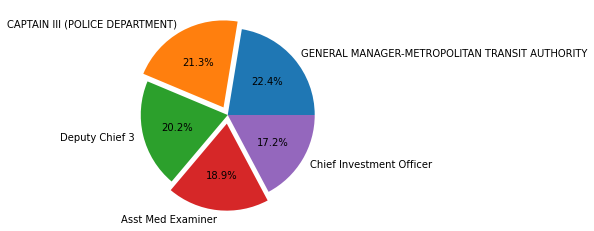

In [288]:
tmp = df.sort_values(by=['TotalPayBenefits'], ascending = False)
tmp = tmp[['JobTitle','TotalPayBenefits']].head()
plt.pie(tmp.TotalPayBenefits, labels = tmp.JobTitle, autopct='%1.1f%%', explode=[0,0.1,0,0.1,0])
#tmp.pivot(index = 'EmployeeName', columns='TotalPayBenefits', values='BasePay')

What profession is the most?

In [289]:
df.JobTitle.mode()

0    Transit Operator
dtype: object

Transit Operator is the most profession from the dataset.

What is top 10 most jobs the people work as?

In [290]:
n = 10
df['JobTitle'].value_counts()[:n].index.tolist()

['Transit Operator',
 'Special Nurse',
 'Registered Nurse',
 'Public Svc Aide-Public Works',
 'Custodian',
 'Police Officer 3',
 'Firefighter',
 'TRANSIT OPERATOR',
 'Recreation Leader',
 'Patient Care Assistant']

In [291]:
tmp23 = df['JobTitle'].value_counts()[:n]

Top 10 work with the numbers of how many people work as that job.

In [292]:
tmp23 = tmp23.to_frame()
tmp23 = tmp23.reset_index()
tmp23 = tmp23.rename(columns={"index": "Name"})
tmp23

,Name,JobTitle
0,Transit Operator,6942
1,Special Nurse,4370
2,Registered Nurse,3712
3,Public Svc Aide-Public Works,2514
4,Custodian,2399
5,Police Officer 3,2369
6,Firefighter,2343
7,TRANSIT OPERATOR,2329
8,Recreation Leader,1968
9,Patient Care Assistant,1933


([<matplotlib.patches.Wedge at 0x7f3ddea62590>,
 [Text(0.8368661425930738, 0.7139012952652413, 'Transit Operator'),
  Text(-0.3389362721354058, 1.1511395238766473, 'Special Nurse'),
  Text(-0.9845813172591836, 0.4905095612770163, 'Registered Nurse'),
  Text(-1.1824518406631856, -0.20446917741372356, 'Public Svc Aide-Public Works'),
  Text(-0.8614729883688006, -0.6840060601419613, 'Custodian'),
  Text(-0.4431429710456062, -1.0067891076153304, 'Police Officer 3'),
  Text(0.07765383985739352, -1.1974848145823822, 'Firefighter'),
  Text(0.5656255338229692, -0.9434340228587695, 'TRANSIT OPERATOR'),
  Text(0.911859981965461, -0.6152327797589698, 'Recreation Leader'),
  Text(1.1768693390432847, -0.23447507078540802, 'Patient Care Assistant')],
 [Text(0.45647244141440385, 0.3894007065083134, '22.5%'),
  Text(-0.19771282541232002, 0.671498055594711, '14.2%'),
  Text(-0.5370443548686455, 0.2675506697874634, '12.0%'),
  Text(-0.6897635737201915, -0.11927368682467206, '8.1%'),
  Text(-0.4698943572

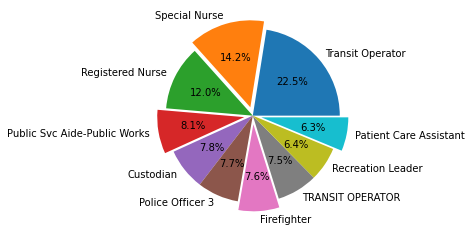

In [293]:
plt.pie(tmp23.JobTitle, labels = tmp23.Name, autopct='%1.1f%%', explode=[0,0.1,0,0.1,0,0,0.1,0,0,0.1])
#tmp.pivot(index = 'EmployeeName', columns='TotalPayBenefits', values='BasePay')

In [294]:
df100 = df.replace("TRANSIT OPERATOR", "Transit Operator")
asd123 = df100['JobTitle'].value_counts()[:n].index.tolist()
indexNames = df100[~df100['JobTitle'].isin(asd123)].index
df100.drop(indexNames)
df100

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148645,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148647,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148648,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


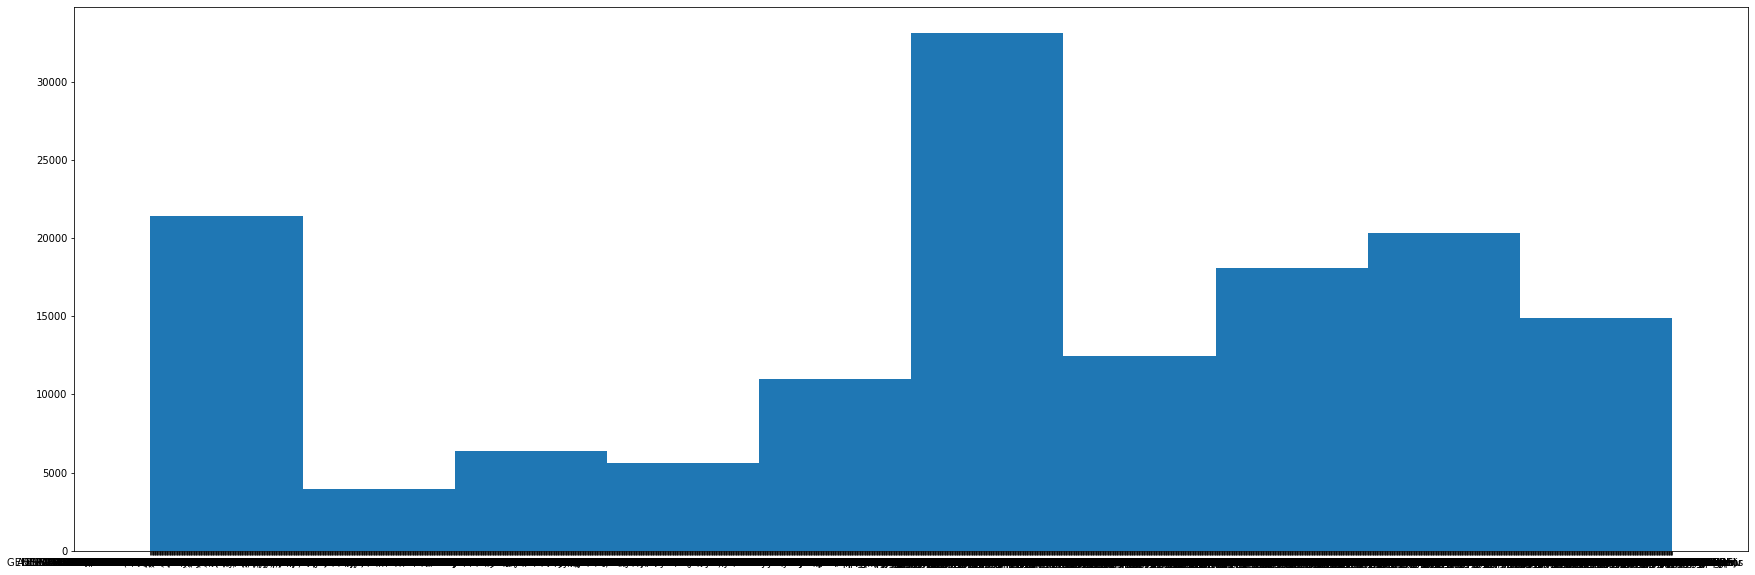

In [298]:
fig, ax = plt.subplots(figsize =(30, 10))
ax.hist(df100["JobTitle"])
 
# Show plot
plt.show()

In [300]:
tmp23 = df100['JobTitle'].value_counts()[:n]
tmp23 = tmp23.to_frame()
tmp23 = tmp23.reset_index()
tmp23 = tmp23.rename(columns={"index": "Name"})
tmp23

,Name,JobTitle
0,Transit Operator,9271
1,Special Nurse,4370
2,Registered Nurse,3712
3,Public Svc Aide-Public Works,2514
4,Custodian,2399
5,Police Officer 3,2369
6,Firefighter,2343
7,Recreation Leader,1968
8,Patient Care Assistant,1933
9,Deputy Sheriff,1909


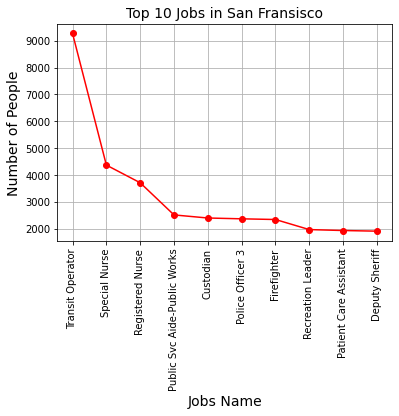

In [306]:
import matplotlib.pyplot as plt
  
plt.plot(tmp23['Name'], tmp23['JobTitle'], color='red', marker='o')
plt.title('Top 10 Jobs in San Fransisco', fontsize=14)
plt.xlabel('Jobs Name', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()